In [ ]:
 !pip install praat-parselmouth
!pip install --upgrade librosa
!pip install librosa scipy
!pip install datasets
!pip install pysptk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.9/461.9 kB 27.2 MB/s eta 0:00:00


In [ ]:
pip install transformers

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, Embedding, GlobalAveragePooling2D, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
import scipy
from scipy.signal import lfilter #hamming
import pysptk
from scipy.io import wavfile
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os

Mounted at /content/drive


## Load File

In [ ]:
data_10_tokens = pd.read_csv('/content/drive/Shared drives/CS298/CS 297/IEMOCAP/IEMOCAP_MAJOR_10_TOKENS.csv')

In [ ]:
data = pd.read_csv('/content/drive/Shared drives/CS298/CS 297/IEMOCAP/IEMOCAP_MAJOR_LABELLED.csv')

In [ ]:
audio_features = pd.read_csv('/content/drive/Shared drives/CS298/CS 297/Code/Audio Models/audio_features_with_major_emotion_all_tokens.csv')

In [ ]:
data.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Audio_Uttrance_Path,category,most_repeated_label
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M001,I wonder.,008.6300-009.6700,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Fear', 'Excited']",fear
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M002,It must be them then.,011.4300-012.7900,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Fear', 'Fear', 'Excited']",fear
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F005,Ahh. It sent shivers up my spine.,025.9111-030.4663,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Frustration', 'Excited', 'Excited']",excited
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M006,What shall we do if they suddenly walk in on us?,029.8095-033.1781,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Frustration', 'Excited', 'Excited']",excited
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F006,Behave exquisitely.,032.8800-034.9200,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Happiness', 'Excited']",excited


In [ ]:
data_10_tokens.head()

,Session,Conversation,Audio_Path,Speaker_id,Transcript,Time_Frame,Audio_Uttrance_Path,category,most_repeated_label
0,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M006,What shall we do if they suddenly walk in on us?,029.8095-033.1781,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Frustration', 'Excited', 'Excited']",excited
1,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_M008,Things that ought to matter dreadfully don't m...,036.8900-040.9600,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Happiness', 'Excited']",excited
2,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F009,It's true the whole business is very poor joke.,044.5300-047.2100,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Excited', 'Excited']",excited
3,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F011,Don't laugh at me. I'm serious.,058.0200-060.9100,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Happiness', 'Excited']",excited
4,Session4,Ses04F_script03_1,/content/drive/My Drive/CS 297/IEMOCAP/Session...,Ses04F_script03_1_F014,"Oh, how long will it last, this ludicrous, ove...",080.9600-086.2504,/content/drive/My Drive/CS 297/IEMOCAP/Session...,"['Excited', 'Happiness', 'Excited']",excited


In [ ]:
len(data_10_tokens)

4524

In [ ]:
audio_features.head()

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LPC_3,LPC_4,LPC_5,LPC_6,LPC_7,LPC_8,LPC_9,LPC_10,Emotion,Speaker_id
0,-307.39905,139.353800,-55.655650,35.709640,-24.282598,-8.041896,-15.103068,-7.157278,-6.234849,4.638667,...,-4.981248,4.880449,-4.198057,3.281164,-2.435601,1.757024,-1.040697,0.348874,fear,Ses04F_script03_1_M001
1,-381.90390,112.582700,-28.641914,41.377426,-14.992129,13.524291,-15.060655,0.119447,-9.428417,12.295828,...,-3.461308,3.362551,-3.217988,2.886278,-2.236722,1.461330,-0.787530,0.277015,fear,Ses04F_script03_1_M002
2,-352.65040,68.832466,-20.212467,16.935734,-22.049332,8.931537,-15.522003,-6.032151,-2.046423,5.841474,...,-3.112117,3.180664,-2.962393,2.690530,-2.234719,1.561520,-0.864859,0.355253,excited,Ses04F_script03_1_F005
3,-421.58060,112.043160,-17.711933,36.504970,-16.693699,13.678688,-12.622216,6.954140,-11.975270,12.579329,...,-2.220973,2.340549,-2.228829,1.871353,-1.385259,1.110445,-0.731721,0.259866,excited,Ses04F_script03_1_M006
4,-375.73663,87.983460,-6.579818,40.463880,-16.663490,-0.006741,-16.591389,5.656933,-15.612326,1.732163,...,-2.902323,2.735996,-2.665594,2.337090,-1.815214,1.168272,-0.410207,0.110669,excited,Ses04F_script03_1_F006


In [ ]:
import pandas as pd

# Assuming data_10_tokens, data, and audio_features are already loaded as DataFrames

# Extract the unique Speaker_id values from data_10_tokens
valid_speaker_ids = set(data_10_tokens['Speaker_id'])

# Filter data and audio_features based on Speaker_id
data = data[data['Speaker_id'].isin(valid_speaker_ids)]
audio_features = audio_features[audio_features['Speaker_id'].isin(valid_speaker_ids)]

# Display the results
print(f"Filtered data length: {len(data)}")
print(f"Filtered audio_features length: {len(audio_features)}")


Filtered data length: 4524
Filtered audio_features length: 4524


In [ ]:
len(audio_features)

4524

In [ ]:
emotion_counts = data['most_repeated_label'].str.strip().str.lower().value_counts()

# Print unique values along with their counts
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

frustration: 1325
neutral: 877
excited: 735
anger: 648
sadness: 575
happiness: 311
surprise: 28
fear: 14
other: 8
disgust: 3


In [ ]:
import pandas as pd

# Modify the labels according to the merging criteria
data['most_repeated_label'] = data['most_repeated_label'].replace({
    'frustration': 'anger',   # Merge 'frustration' into 'anger'
    'excited': 'happy',       # Merge 'excited' into 'happy'
    'happiness': 'happy'      # Merge 'happiness' into 'happy'
})

# Drop rows with the labels: 'surprise', 'fear', 'other', and 'disgust'
data = data[~data['most_repeated_label'].isin(['surprise', 'fear', 'other', 'disgust'])]

# Print updated value counts to verify
print(data['most_repeated_label'].value_counts())

most_repeated_label
anger      1973
happy      1046
neutral     877
sadness     575
Name: count, dtype: int64


<ipython-input-16-2414fee28da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['most_repeated_label'] = data['most_repeated_label'].replace({


In [ ]:
len(data)

4471

In [ ]:
emotion_counts = audio_features['Emotion'].str.strip().str.lower().value_counts()

# Print unique values along with their counts
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

frustration: 1325
neutral: 877
excited: 735
anger: 648
sadness: 575
happiness: 311
surprise: 28
fear: 14
other: 8
disgust: 3


In [ ]:
import pandas as pd

# Modify the labels according to the merging criteria
audio_features['Emotion'] = audio_features['Emotion'].replace({
    'frustration': 'anger',   # Merge 'frustration' into 'anger'
    'excited': 'happy',       # Merge 'excited' into 'happy'
    'happiness': 'happy'      # Merge 'happiness' into 'happy'
})

# Drop rows with the labels: 'surprise', 'fear', 'other', and 'disgust'
audio_features = audio_features[~audio_features['Emotion'].isin(['surprise', 'fear', 'other', 'disgust'])]

# Print updated value counts to verify
print(audio_features['Emotion'].value_counts())

Emotion
anger      1973
happy      1046
neutral     877
sadness     575
Name: count, dtype: int64


<ipython-input-19-1ea9dcc525bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audio_features['Emotion'] = audio_features['Emotion'].replace({


In [ ]:
audio_features.drop(columns=['Emotion', 'Speaker_id'], inplace=True)

In [ ]:
len(audio_features)

4471

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer
import pandas as pd
import numpy as np

class MultimodalEmotionDataset(Dataset):
    def __init__(self, text_data, audio_data, tokenizer_name='roberta-base', max_length=128):
        # Ensure both datasets are aligned
        assert len(text_data) == len(audio_data), "Text and audio datasets must have same length"

        self.text_data = text_data
        self.audio_features = audio_data.iloc[:, :81].values  # Get first 81 columns as features

        # Convert labels to numerical values
        self.label_map = {'happy': 0, 'neutral': 1, 'anger': 2, 'sadness': 3}
        self.labels = [self.label_map[label] for label in text_data['most_repeated_label']]

        # Initialize tokenizer
        self.tokenizer = RobertaTokenizer.from_pretrained(tokenizer_name)
        self.max_length = max_length

    def __len__(self):
        return len(self.text_data)

    def __getitem__(self, idx):
        # Get text features
        text = self.text_data['Transcript'].iloc[idx]
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Remove the batch dimension added by the tokenizer
        text_features = {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0)
        }

        # Get audio features
        audio_features = torch.FloatTensor(self.audio_features[idx])

        # Get label
        label = torch.tensor(self.labels[idx])

        return {
            'text': text_features,
            'audio': audio_features,
            'label': label
        }

# Create the dataset and data loaders
def create_data_loaders(text_data, audio_data, batch_size=32, train_split=0.7, val_split=0.15):
    # Create dataset
    dataset = MultimodalEmotionDataset(text_data, audio_data)

    # Calculate split sizes
    total_size = len(dataset)
    train_size = int(train_split * total_size)
    val_size = int(val_split * total_size)
    test_size = total_size - train_size - val_size

    # Split dataset
    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
        dataset,
        [train_size, val_size, test_size],
        generator=torch.Generator().manual_seed(42)
    )

    # Create data loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2
    )

    return train_loader, val_loader, test_loader

# Create the data loaders
train_loader, val_loader, test_loader = create_data_loaders(data, audio_features)

print(f"Number of batches in train loader: {len(train_loader)}")
print(f"Number of batches in validation loader: {len(val_loader)}")
print(f"Number of batches in test loader: {len(test_loader)}")

# Test a batch
sample_batch = next(iter(train_loader))
print("\nSample batch structure:")
print("Text input_ids shape:", sample_batch['text']['input_ids'].shape)
print("Text attention_mask shape:", sample_batch['text']['attention_mask'].shape)
print("Audio features shape:", sample_batch['audio'].shape)
print("Labels shape:", sample_batch['label'].shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Number of batches in train loader: 98
Number of batches in validation loader: 21
Number of batches in test loader: 21

Sample batch structure:
Text input_ids shape: torch.Size([32, 128])
Text attention_mask shape: torch.Size([32, 128])
Audio features shape: torch.Size([32, 81])
Labels shape: torch.Size([32])


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but sel


Training and Evaluating Late Fusion Model
Epoch 1/25
Training Loss: 5.0026
Validation Loss: 1.3841
Validation Accuracy: 49.85%
Validation F1 Score: 0.3961
--------------------------------------------------
Epoch 2/25
Training Loss: 1.9685
Validation Loss: 0.8770
Validation Accuracy: 68.36%
Validation F1 Score: 0.6774
--------------------------------------------------
Epoch 3/25
Training Loss: 0.9672
Validation Loss: 0.7516
Validation Accuracy: 72.39%
Validation F1 Score: 0.7178
--------------------------------------------------
Epoch 4/25
Training Loss: 0.6175
Validation Loss: 0.6924
Validation Accuracy: 75.82%
Validation F1 Score: 0.7563
--------------------------------------------------
Epoch 5/25
Training Loss: 0.4604
Validation Loss: 0.6916
Validation Accuracy: 74.93%
Validation F1 Score: 0.7498
--------------------------------------------------
Epoch 6/25
Training Loss: 0.3594
Validation Loss: 0.7219
Validation Accuracy: 75.22%
Validation F1 Score: 0.7593
------------------------

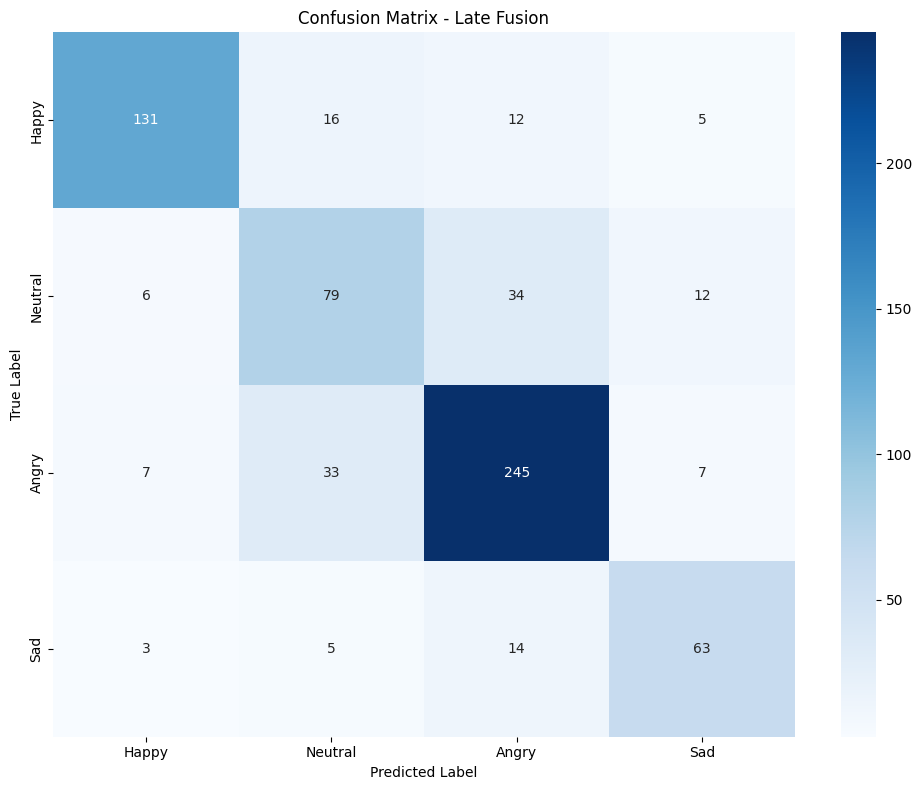

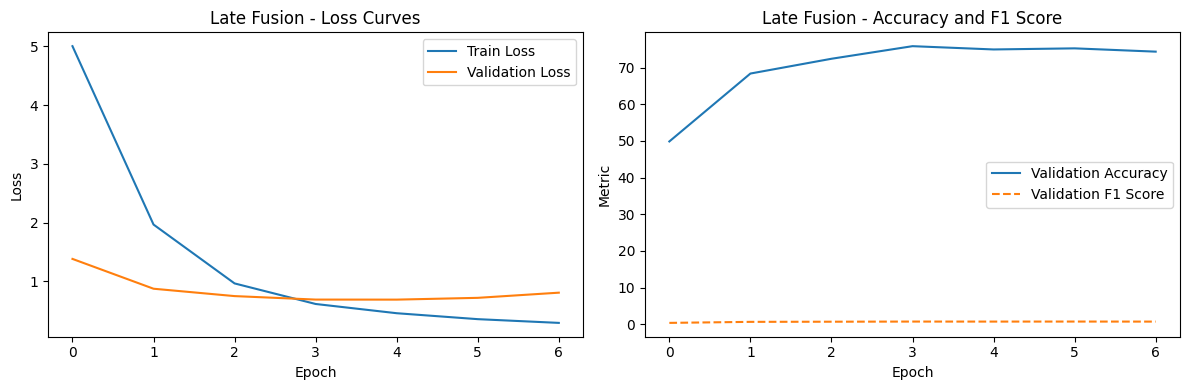


Test Accuracy - Late Fusion: 77.08%
Test Weighted F1 Score - Late Fusion: 0.7716

Classification Report:
              precision    recall  f1-score   support

       Happy       0.89      0.80      0.84       164
     Neutral       0.59      0.60      0.60       131
       Angry       0.80      0.84      0.82       292
         Sad       0.72      0.74      0.73        85

    accuracy                           0.77       672
   macro avg       0.75      0.75      0.75       672
weighted avg       0.77      0.77      0.77       672


Training and Evaluating Hierarchical Attention Model
Epoch 1/25
Training Loss: 5.3319
Validation Loss: 1.2804
Validation Accuracy: 51.94%
Validation F1 Score: 0.5219
--------------------------------------------------
Epoch 2/25
Training Loss: 1.7152
Validation Loss: 0.8684
Validation Accuracy: 66.27%
Validation F1 Score: 0.6408
--------------------------------------------------
Epoch 3/25
Training Loss: 0.8148
Validation Loss: 0.7243
Validation Accuracy:

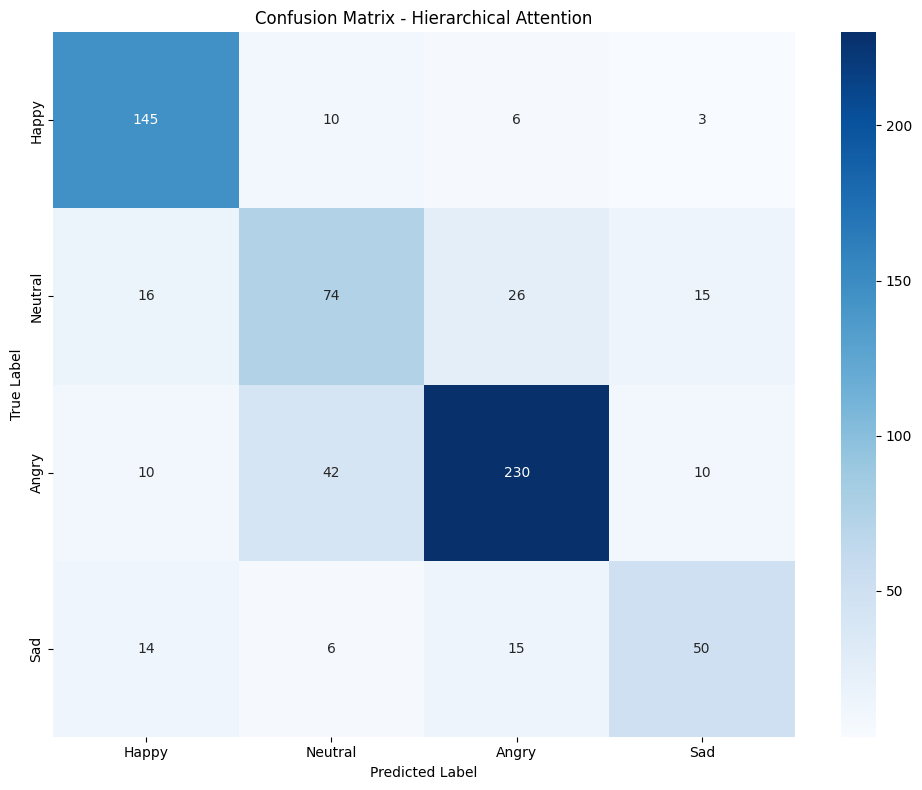

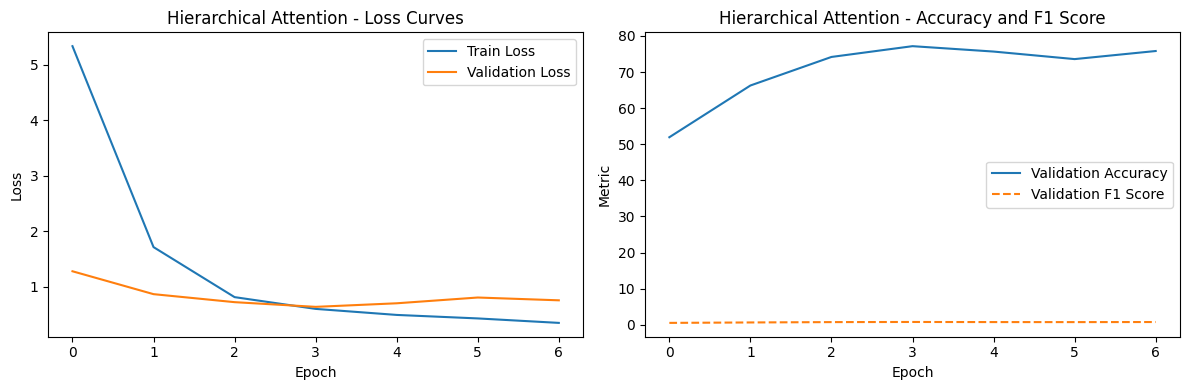


Test Accuracy - Hierarchical Attention: 74.26%
Test Weighted F1 Score - Hierarchical Attention: 0.7414

Classification Report:
              precision    recall  f1-score   support

       Happy       0.78      0.88      0.83       164
     Neutral       0.56      0.56      0.56       131
       Angry       0.83      0.79      0.81       292
         Sad       0.64      0.59      0.61        85

    accuracy                           0.74       672
   macro avg       0.70      0.71      0.70       672
weighted avg       0.74      0.74      0.74       672


Training and Evaluating Cross-Modal Transformer Model
Epoch 1/25
Training Loss: 1.1542
Validation Loss: 0.8797
Validation Accuracy: 66.12%
Validation F1 Score: 0.6603
--------------------------------------------------
Epoch 2/25
Training Loss: 0.7447
Validation Loss: 0.7060
Validation Accuracy: 73.28%
Validation F1 Score: 0.7292
--------------------------------------------------
Epoch 3/25
Training Loss: 0.5094
Validation Loss: 0.68

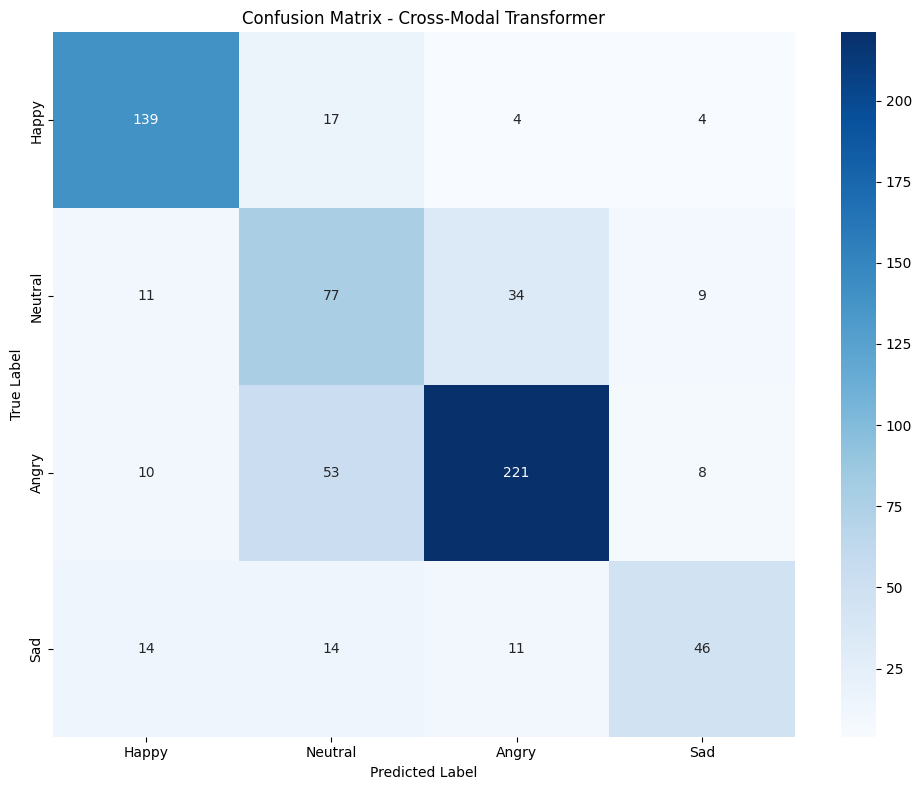

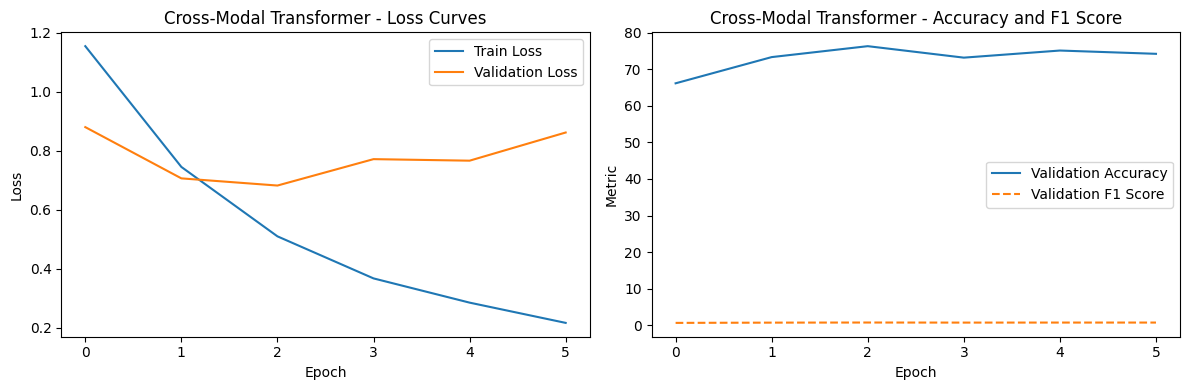


Test Accuracy - Cross-Modal Transformer: 71.88%
Test Weighted F1 Score - Cross-Modal Transformer: 0.7218

Classification Report:
              precision    recall  f1-score   support

       Happy       0.80      0.85      0.82       164
     Neutral       0.48      0.59      0.53       131
       Angry       0.82      0.76      0.79       292
         Sad       0.69      0.54      0.61        85

    accuracy                           0.72       672
   macro avg       0.70      0.68      0.69       672
weighted avg       0.73      0.72      0.72       672


Training and Evaluating Gated Multimodal Model
Epoch 1/25
Training Loss: 4.3215
Validation Loss: 1.2907
Validation Accuracy: 44.63%
Validation F1 Score: 0.3987
--------------------------------------------------
Epoch 2/25
Training Loss: 2.3613
Validation Loss: 1.0361
Validation Accuracy: 56.87%
Validation F1 Score: 0.5159
--------------------------------------------------
Epoch 3/25
Training Loss: 1.3470
Validation Loss: 0.7786
Va

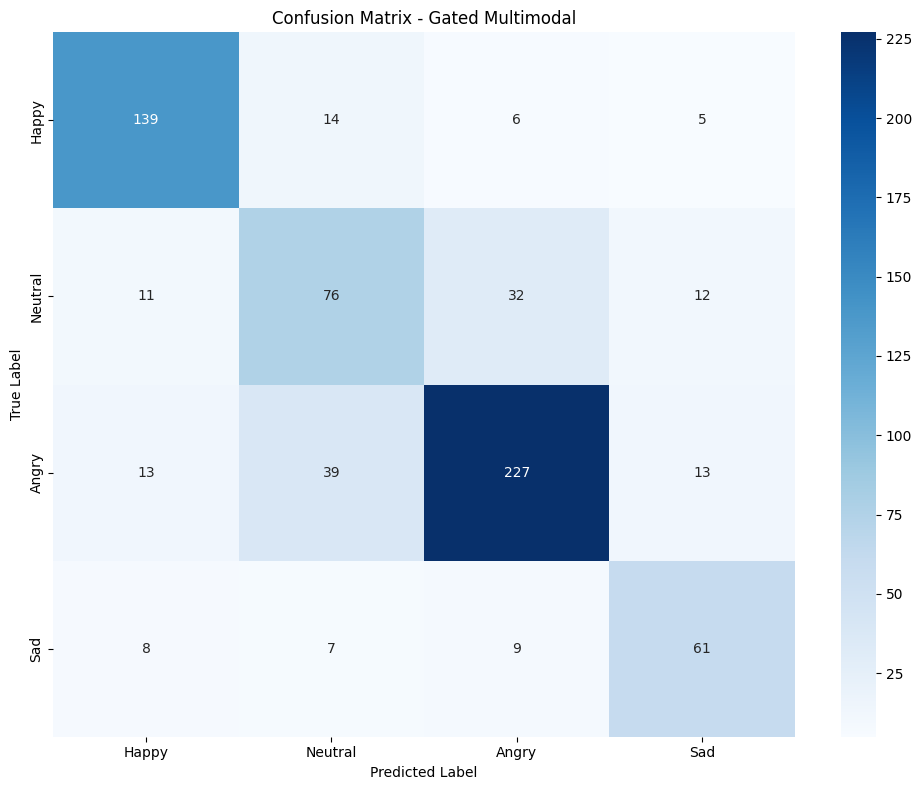

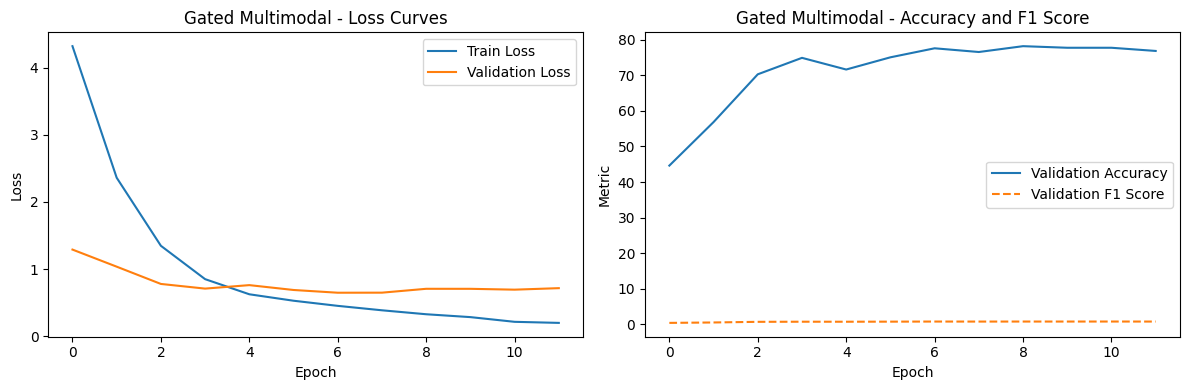


Test Accuracy - Gated Multimodal: 74.85%
Test Weighted F1 Score - Gated Multimodal: 0.7497

Classification Report:
              precision    recall  f1-score   support

       Happy       0.81      0.85      0.83       164
     Neutral       0.56      0.58      0.57       131
       Angry       0.83      0.78      0.80       292
         Sad       0.67      0.72      0.69        85

    accuracy                           0.75       672
   macro avg       0.72      0.73      0.72       672
weighted avg       0.75      0.75      0.75       672



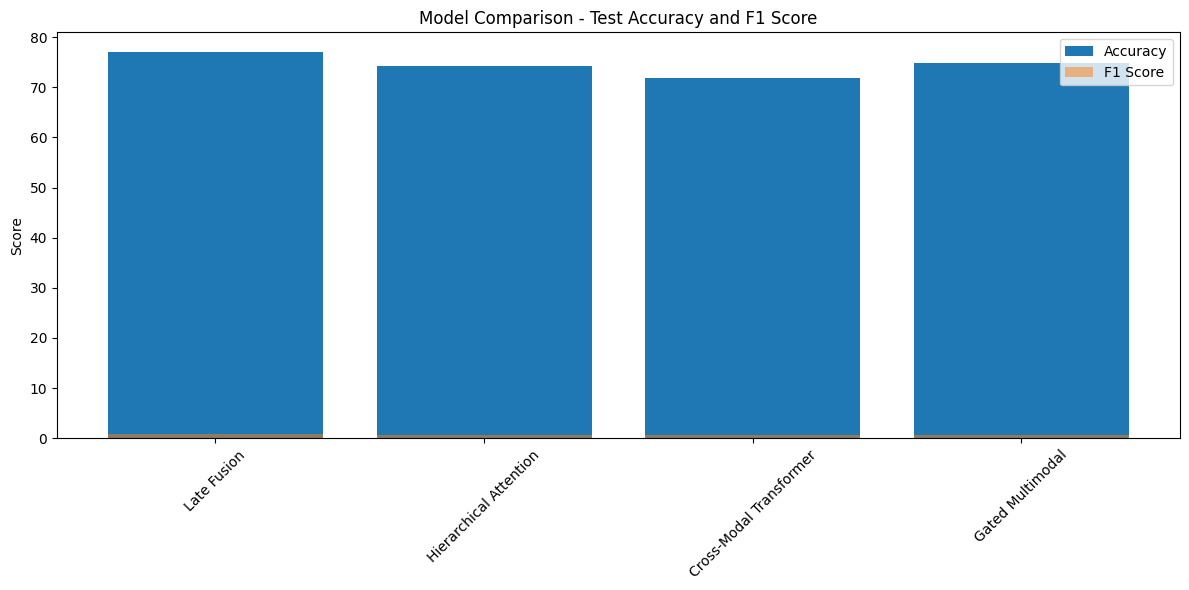


Final Model Comparison Summary:
--------------------------------------------------
Late Fusion:
Test Accuracy: 77.08%
Test F1 Score: 0.7716
--------------------------------------------------
Hierarchical Attention:
Test Accuracy: 74.26%
Test F1 Score: 0.7414
--------------------------------------------------
Cross-Modal Transformer:
Test Accuracy: 71.88%
Test F1 Score: 0.7218
--------------------------------------------------
Gated Multimodal:
Test Accuracy: 74.85%
Test F1 Score: 0.7497
--------------------------------------------------


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score as sklearn_f1_score
from transformers import RobertaModel

class LateFusion(nn.Module):
    def __init__(self, audio_features=81, num_classes=4):
        super().__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        hidden_size = self.roberta.config.hidden_size

        # Audio processing
        self.audio_encoder = nn.Sequential(
            nn.Linear(audio_features, 256),
            nn.ReLU(),
            nn.Linear(256, hidden_size)
        )

        # Individual classifiers
        self.text_classifier = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

        self.audio_classifier = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, text_inputs, audio_features):
        # Process text
        text_outputs = self.roberta(**text_inputs)[0]
        text_feature = torch.mean(text_outputs, dim=1)
        text_logits = self.text_classifier(text_feature)

        # Process audio
        audio_feature = self.audio_encoder(audio_features)
        audio_logits = self.audio_classifier(audio_feature)

        # Late fusion (average logits)
        combined_logits = (text_logits + audio_logits) / 2

        return combined_logits

class HierarchicalAttentionFusion(nn.Module):
    def __init__(self, audio_features=81, num_classes=4):
        super().__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        hidden_size = self.roberta.config.hidden_size

        # Audio processing
        self.audio_encoder = nn.Sequential(
            nn.Linear(audio_features, 256),
            nn.ReLU(),
            nn.Linear(256, hidden_size)
        )

        # Attention mechanisms
        self.text_attention = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.Tanh(),
            nn.Linear(128, 1)
        )

        self.audio_attention = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.Tanh(),
            nn.Linear(128, 1)
        )

        # Final classifier
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size * 2, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, text_inputs, audio_features):
        # Process text
        text_outputs = self.roberta(**text_inputs)[0]

        # Process audio
        audio_encoded = self.audio_encoder(audio_features).unsqueeze(1)

        # Apply attention to text
        text_attention_weights = self.text_attention(text_outputs)
        text_attention_weights = torch.softmax(text_attention_weights, dim=1)
        text_feature = torch.sum(text_outputs * text_attention_weights, dim=1)

        # Apply attention to audio
        audio_attention_weights = self.audio_attention(audio_encoded)
        audio_attention_weights = torch.softmax(audio_attention_weights, dim=1)
        audio_feature = torch.sum(audio_encoded * audio_attention_weights, dim=1)

        # Concatenate and classify
        combined_feature = torch.cat([text_feature, audio_feature], dim=1)
        output = self.classifier(combined_feature)

        return output

class CrossModalTransformerFusion(nn.Module):
    def __init__(self, audio_features=81, num_classes=4):
        super().__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        hidden_size = self.roberta.config.hidden_size

        # Audio processing
        self.audio_encoder = nn.Sequential(
            nn.Linear(audio_features, 256),
            nn.ReLU(),
            nn.Linear(256, hidden_size)
        )

        # Cross-modal transformer
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=8)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)

        # Final classifier
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size * 2, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, text_inputs, audio_features):
        # Process text
        text_outputs = self.roberta(**text_inputs)[0]

        # Process audio
        audio_encoded = self.audio_encoder(audio_features).unsqueeze(1)

        # Combine modalities for transformer
        combined_features = torch.cat([text_outputs, audio_encoded], dim=1)

        # Apply transformer
        transformed_features = self.transformer(combined_features)

        # Pool features
        text_feature = transformed_features[:, 0]
        audio_feature = transformed_features[:, -1]

        # Concatenate and classify
        combined_feature = torch.cat([text_feature, audio_feature], dim=1)
        output = self.classifier(combined_feature)

        return output

class GatedMultimodalFusion(nn.Module):
    def __init__(self, audio_features=81, num_classes=4):
        super().__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        hidden_size = self.roberta.config.hidden_size

        # Audio processing
        self.audio_encoder = nn.Sequential(
            nn.Linear(audio_features, 256),
            nn.ReLU(),
            nn.Linear(256, hidden_size)
        )

        # Gating mechanism
        self.text_gate = nn.Linear(hidden_size, hidden_size)
        self.audio_gate = nn.Linear(hidden_size, hidden_size)

        # Final classifier
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )

    def forward(self, text_inputs, audio_features):
        # Process text
        text_outputs = self.roberta(**text_inputs)[0]
        text_feature = torch.mean(text_outputs, dim=1)

        # Process audio
        audio_feature = self.audio_encoder(audio_features)

        # Calculate gates
        text_gate_value = torch.sigmoid(self.text_gate(text_feature))
        audio_gate_value = torch.sigmoid(self.audio_gate(audio_feature))

        # Apply gating and fusion
        fused_feature = (text_gate_value * text_feature + audio_gate_value * audio_feature) / 2

        # Classify
        output = self.classifier(fused_feature)

        return output

def train_and_evaluate_model(model, train_loader, val_loader, test_loader, model_name):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2)

    num_epochs = 25

    best_val_accuracy = 0
    best_val_f1 = 0
    best_val_loss = float('inf')
    patience = 3
    patience_counter = 0

    train_losses = []
    val_losses = []
    val_accuracies = []
    val_f1_scores = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        total_loss = 0

        for batch in train_loader:
            text_inputs = {k: v.to(device) for k, v in batch['text'].items()}
            audio_features = batch['audio'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()
            outputs = model(text_inputs, audio_features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for batch in val_loader:
                text_inputs = {k: v.to(device) for k, v in batch['text'].items()}
                audio_features = batch['audio'].to(device)
                labels = batch['label'].to(device)

                outputs = model(text_inputs, audio_features)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())


        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        val_accuracy = 100 * correct / total
        val_accuracies.append(val_accuracy)

        # Calculate Weighted F1 score for validation
        val_f1 = sklearn_f1_score(all_labels, all_preds, average='weighted')
        val_f1_scores.append(val_f1)

        scheduler.step(avg_val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Training Loss: {avg_train_loss:.4f}')
        print(f'Validation Loss: {avg_val_loss:.4f}')
        print(f'Validation Accuracy: {val_accuracy:.2f}%')
        print(f'Validation F1 Score: {val_f1:.4f}')
        print('-' * 50)


        if val_accuracy > best_val_accuracy and val_f1 > best_val_f1:
            best_val_accuracy = val_accuracy
            best_val_f1 = val_f1
            best_val_loss = avg_val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

    # Testing
    model.eval()
    all_preds = []
    all_labels = []
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for batch in test_loader:
            text_inputs = {k: v.to(device) for k, v in batch['text'].items()}
            audio_features = batch['audio'].to(device)
            labels = batch['label'].to(device)

            outputs = model(text_inputs, audio_features)
            _, predicted = torch.max(outputs.data, 1)

            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_accuracy = 100 * test_correct / test_total

    # Calculate Weighted F1 score for test data
    test_f1 = sklearn_f1_score(all_labels, all_preds, average='weighted')


    # Plot confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Happy', 'Neutral', 'Angry', 'Sad'],
                yticklabels=['Happy', 'Neutral', 'Angry', 'Sad'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    # Plot training curves
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'{model_name} - Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.plot(val_f1_scores, label='Validation F1 Score', linestyle='--')
    plt.title(f'{model_name} - Accuracy and F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"\nTest Accuracy - {model_name}: {test_accuracy:.2f}%")
    print(f"Test Weighted F1 Score - {model_name}: {test_f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds,
                              target_names=['Happy', 'Neutral', 'Angry', 'Sad']))

    return test_accuracy, test_f1, cm


models = {
    'Late Fusion': LateFusion(),
    'Hierarchical Attention': HierarchicalAttentionFusion(),
    'Cross-Modal Transformer': CrossModalTransformerFusion(),
    'Gated Multimodal': GatedMultimodalFusion()
}

results = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training and Evaluating {name} Model")
    print('='*50)

    accuracy, f1_score, conf_matrix = train_and_evaluate_model(
        model, train_loader, val_loader, test_loader, name
    )
    results[name] = {'accuracy': accuracy, 'f1_score': f1_score, 'confusion_matrix': conf_matrix}

# Compare accuracies with bar plot
plt.figure(figsize=(12, 6))
accuracies = [results[model]['accuracy'] for model in models.keys()]
f1_scores = [results[model]['f1_score'] for model in models.keys()]
plt.bar(models.keys(), accuracies, label='Accuracy')
plt.bar(models.keys(), f1_scores, label='F1 Score', alpha=0.5)
plt.title('Model Comparison - Test Accuracy and F1 Score')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print final comparison summary
print("\nFinal Model Comparison Summary:")
print("-"*50)
for name in models.keys():
    print(f"{name}:")
    print(f"Test Accuracy: {results[name]['accuracy']:.2f}%")
    print(f"Test F1 Score: {results[name]['f1_score']:.4f}%")
    print("-"*50)

